I have made many changes to this code while executing it, so now it became a mess :D

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
#df.pop('usa_cpi')
#df.pop('pol_cpi')
#df.pop('usa_inter')
#df.pop('pol_inter')
df.pop('Date')

In [ ]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Opening', 'High', 'Low', 'Closing','Momentum', 'Range', 'ohlc','usa_cpi','pol_cpi', 'usa_inter', 'pol_inter'])

In [ ]:
df1 = df_scaled.iloc[0:1001]
df2 = df_scaled.iloc[1001:2001]
df3 = df_scaled.iloc[2001:]

In [ ]:
std = df['Closing'].std()
std_scaled = df_scaled['Closing'].std()

In [ ]:
float_data1 = np.array(df1).astype('float32')
float_data2 = np.array(df2).astype('float32')
float_data3 = np.array(df3).astype('float32')

In [ ]:
lookback = 10
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen1 = generator(float_data1,
lookback=lookback,
delay=delay,
min_index=0,
max_index=701,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen1 = generator(float_data1,
lookback=lookback,
delay=delay,
min_index=701,
max_index=851,
step=step,
batch_size=batch_size)

In [ ]:
test_gen1 = generator(float_data1,
lookback=lookback,
delay=delay,
min_index=851,
max_index=1001,
step=step,
batch_size=batch_size)

In [ ]:
val_steps1 = (851 - 701 - lookback)
test_steps1 = (1001 - 851 - lookback)

In [ ]:
train_gen2 = generator(float_data2,
lookback=lookback,
delay=delay,
min_index=0,
max_index=701,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen2 = generator(float_data2,
lookback=lookback,
delay=delay,
min_index=701,
max_index=851,
step=step,
batch_size=batch_size)

In [ ]:
test_gen2 = generator(float_data2,
lookback=lookback,
delay=delay,
min_index=851,
max_index=1001,
step=step,
batch_size=batch_size)

In [ ]:
val_steps2 = (851 - 701 - lookback)
test_steps2 = (1001 - 851 - lookback)

In [ ]:
test_gen3 = generator(float_data3,
lookback=lookback,
delay=delay,
min_index=0,
max_index=1001,
step=step,
batch_size=batch_size)

In [ ]:
test_steps3 = (1001 - lookback)

Whole data scalled, divided into 3 sets and trained separately

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data1.shape[-1])))
model1.add(layers.Dense(5,
  activation='softmax',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen1,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen1,
  validation_steps=val_steps1)

Epoch 1/80
400/400 [==============================] - 32s 72ms/step - loss: 0.0929 - val_loss: 0.0377
Epoch 2/80
400/400 [==============================] - 30s 76ms/step - loss: 0.0759 - val_loss: 0.0423
Epoch 3/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0239 - val_loss: 0.0285
Epoch 4/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0225 - val_loss: 0.0259
Epoch 5/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0219 - val_loss: 0.0273
Epoch 6/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0214 - val_loss: 0.0234
Epoch 7/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0211 - val_loss: 0.0223
Epoch 8/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0207 - val_loss: 0.0207
Epoch 9/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0204 - val_loss: 0.0225
Epoch 10/80
400/400 [==============================] - 20s 49ms/step - loss: 0.020

In [ ]:
eval = model1.evaluate(test_gen1, steps = test_steps1)

140/140 [==============================] - 2s 12ms/step - loss: 0.0147


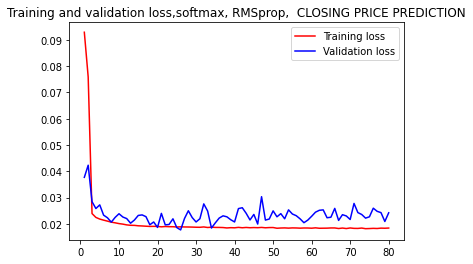

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
history2 = model1.fit(train_gen2,
  steps_per_epoch=400,
  epochs=80,
  validation_data=val_gen2,
  validation_steps=val_steps2)

Epoch 1/80
400/400 [==============================] - 25s 62ms/step - loss: 0.0270 - val_loss: 0.0239
Epoch 2/80
400/400 [==============================] - 19s 49ms/step - loss: 0.0219 - val_loss: 0.0241
Epoch 3/80
400/400 [==============================] - 19s 49ms/step - loss: 0.0211 - val_loss: 0.0247
Epoch 4/80
400/400 [==============================] - 20s 49ms/step - loss: 0.0202 - val_loss: 0.0223
Epoch 5/80
400/400 [==============================] - 21s 53ms/step - loss: 0.0200 - val_loss: 0.0281
Epoch 6/80
400/400 [==============================] - 20s 51ms/step - loss: 0.0196 - val_loss: 0.0255
Epoch 7/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0193 - val_loss: 0.0250
Epoch 8/80
400/400 [==============================] - 20s 51ms/step - loss: 0.0191 - val_loss: 0.0235
Epoch 9/80
400/400 [==============================] - 20s 50ms/step - loss: 0.0191 - val_loss: 0.0256
Epoch 10/80
400/400 [==============================] - 21s 52ms/step - loss: 0.018

In [ ]:
eval2 = model1.evaluate(test_gen2, steps = test_steps2)

140/140 [==============================] - 2s 12ms/step - loss: 0.0827


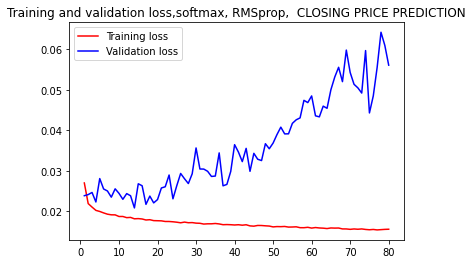

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop,  CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
eval3 = model1.evaluate(test_gen3, steps = test_steps3)

991/991 [==============================] - 12s 12ms/step - loss: 0.0732
